In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [7]:
data = pd.read_csv("musk_csv.csv")

### EDA

In [8]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [9]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [10]:
data.shape

(6598, 170)

In [11]:
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [16]:
data[['molecule_name']].value_counts()

molecule_name
NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-j130       2
NON-MUSK-295        2
NON-MUSK-290        2
NON-MUSK-j96        1
NON-MUSK-j97        1
Length: 102, dtype: int64

In [17]:
data[['conformation_name']].value_counts()

conformation_name
jp13_2+9             1
252_2+271            1
252_2+262            1
252_2+263            1
252_2+264            1
                    ..
j146_1+123           1
j146_1+124           1
j146_1+125           1
j146_1+126           1
192_1+1              1
Length: 6598, dtype: int64

In [18]:
data.drop("conformation_name" , axis = 1 , inplace = True) # droping column conformation_name

In [21]:
data.drop(['molecule_name' , 'ID'] , axis = 1  , inplace = True) # droping column molecule_name

In [22]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


<AxesSubplot:>

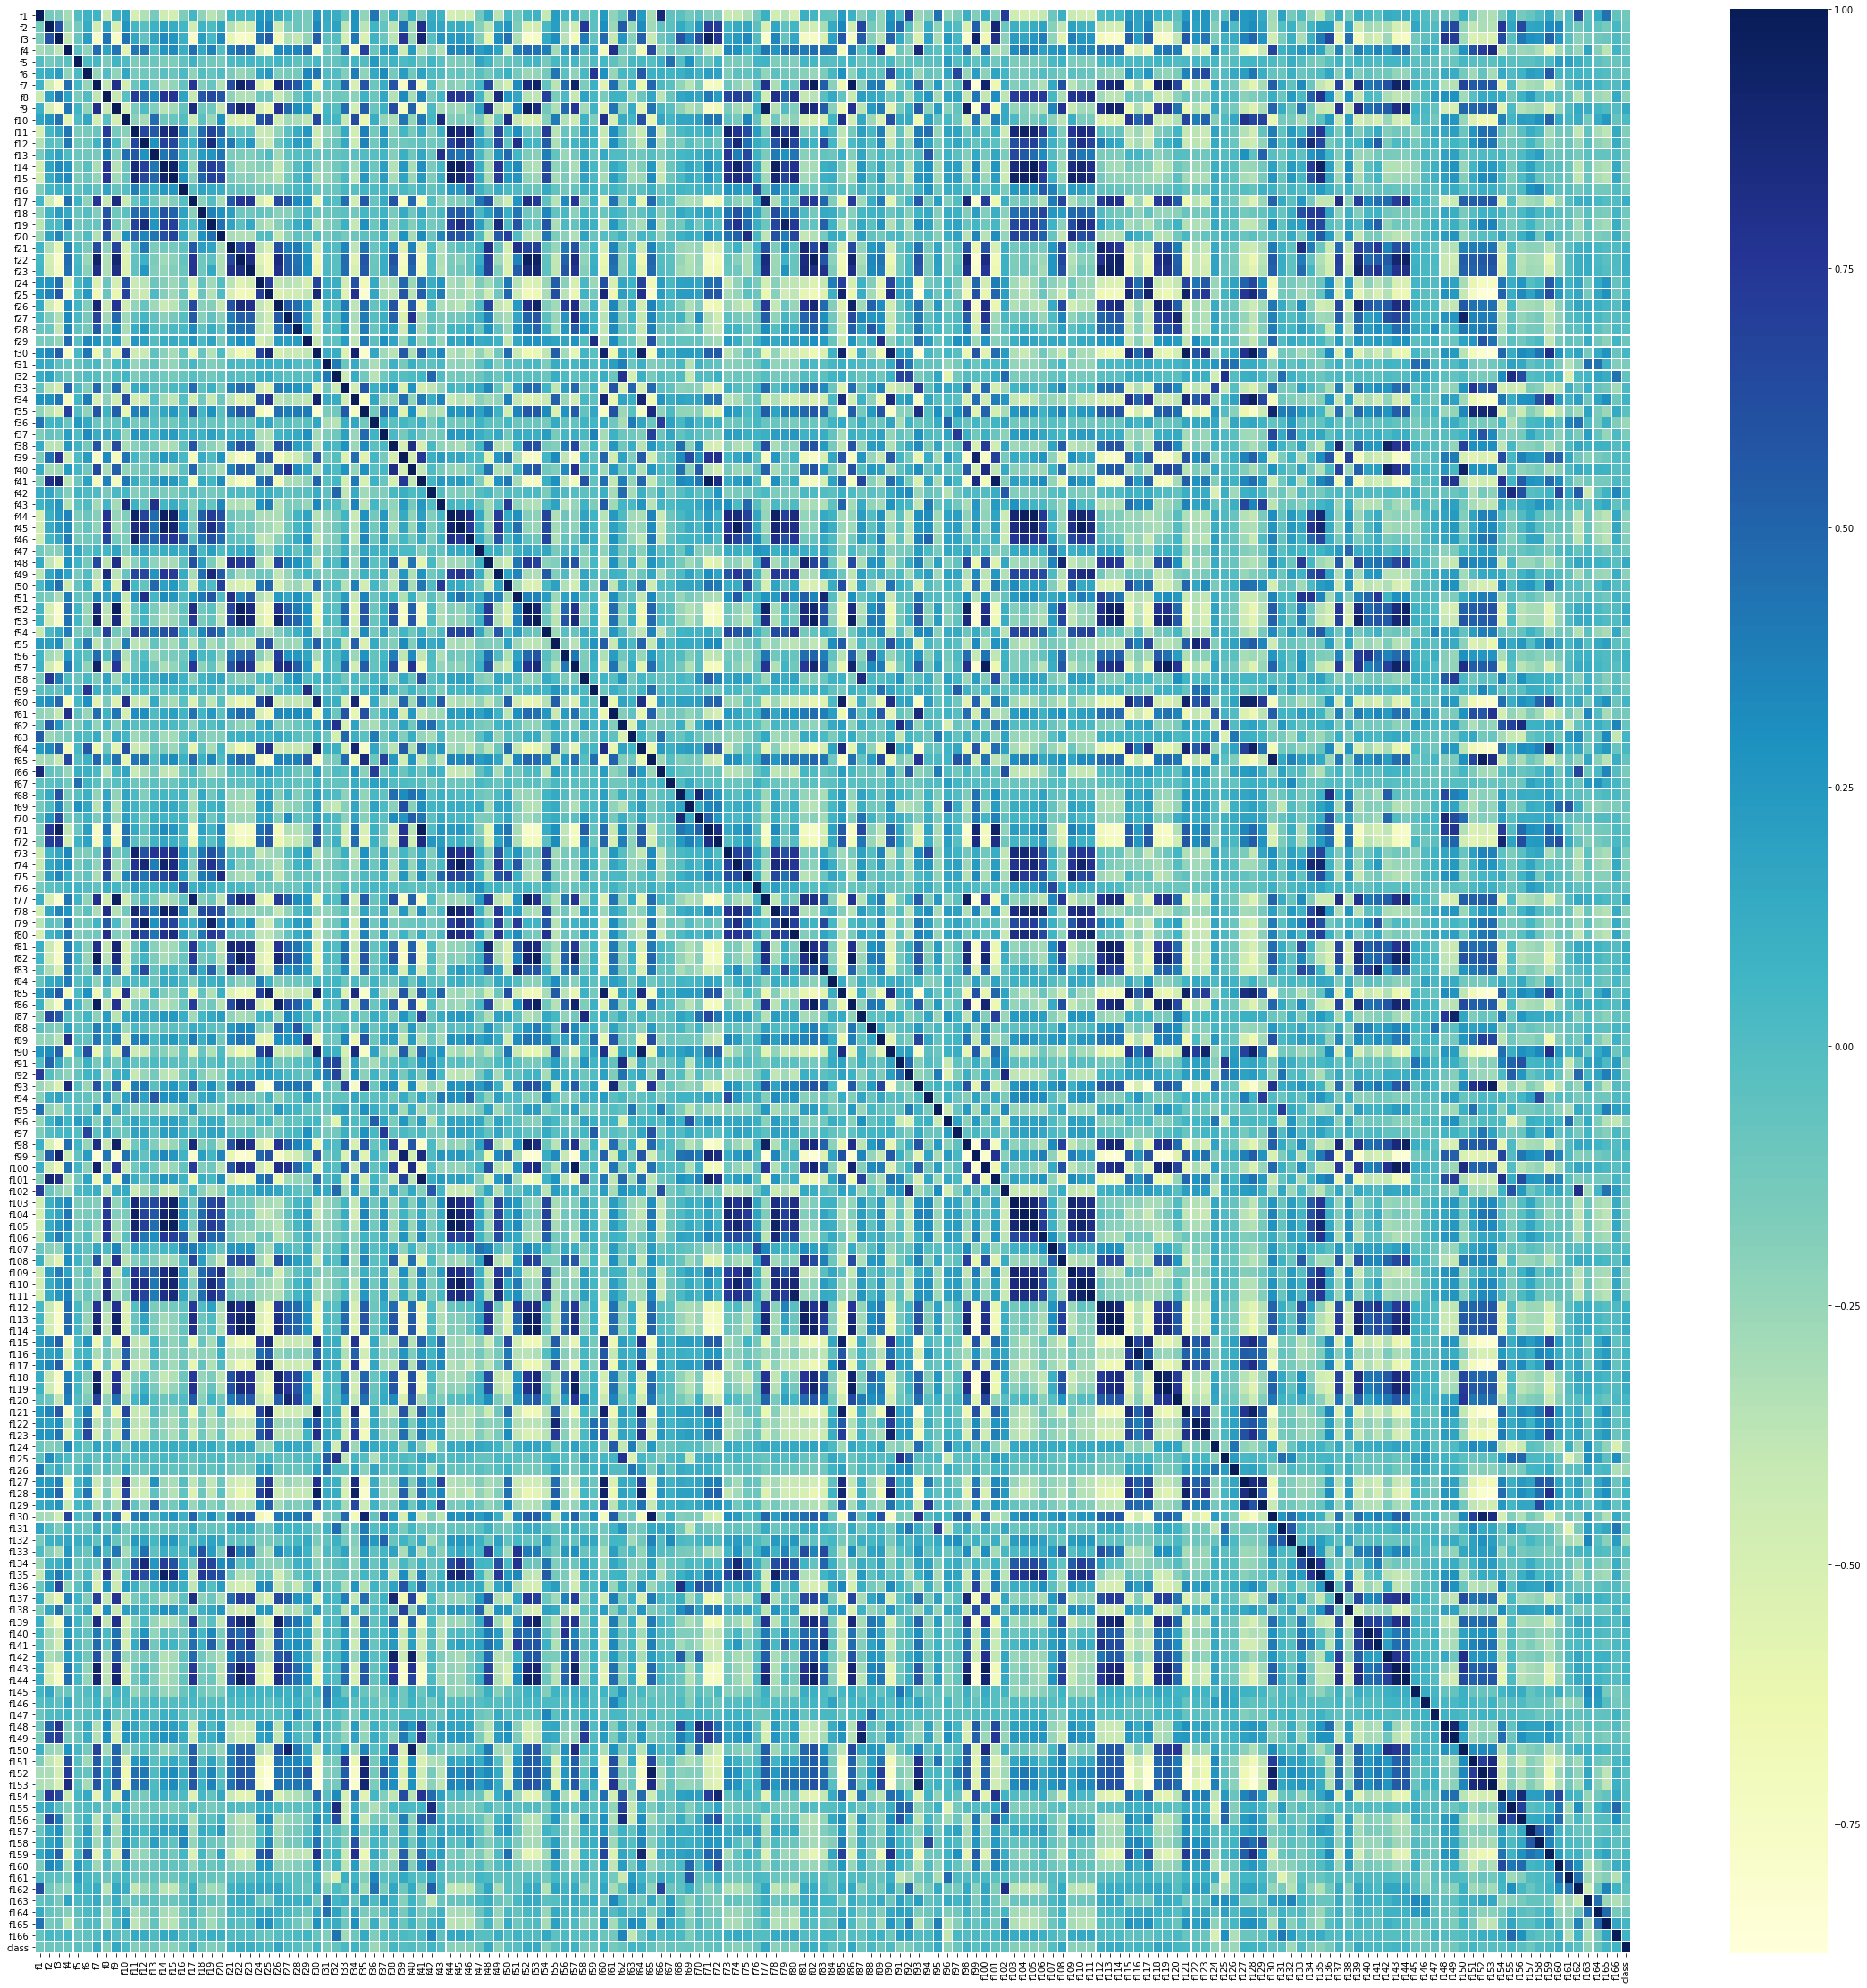

In [25]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(40, 40)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

## Standarization and PCA

In [30]:
y = data['class'].values

x = data.iloc[: , :166].values

In [58]:
train_set, val_set, train_lbl, val_lbl = train_test_split( x, y, test_size=0.2, random_state=0)

In [59]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_set)
# Apply transform to both the training set and the validation set.
train_set = scaler.transform(train_set)
val_set = scaler.transform(val_set)

In [60]:
pca = PCA(0.95) # PCA to retain 95% of variance
principalComponents = pca.fit(train_set)
train_set = pca.transform(train_set)
val_set = pca.transform(val_set)

In [62]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('SUM of Explained variation per principal component: {}'.format(sum(pca.explained_variance_ratio_)))
print("Number of Components: {}".format(pca.n_components_))

Explained variation per principal component: [0.29154277 0.17920091 0.04874384 0.04332552 0.03523901 0.03207665
 0.02945289 0.02675355 0.02395671 0.02339832 0.01874865 0.01787214
 0.01588871 0.01456732 0.01279365 0.012591   0.01119807 0.01042582
 0.00889019 0.00862924 0.00707364 0.00655474 0.00648288 0.00627606
 0.00610369 0.00586812 0.00516915 0.00507613 0.00454921 0.0044022
 0.00409069 0.00366971 0.00358041 0.00355922 0.00329475 0.00307331
 0.00288985 0.00266096 0.00245001]
SUM of Explained variation per principal component: 0.9521197017265643
Number of Components: 39


In [67]:
print(train_set.shape)
print(val_set.shape)
print(train_lbl.shape)
print(val_lbl.shape)

(5278, 39)
(1320, 39)
(5278,)
(1320,)


In [68]:
# saving features for future use
np.savez('train_val.npz' , train_set=train_set , train_lbl = train_lbl , val_set = val_set , val_lbl = val_lbl)

## Model

### Multi-Layer Perceptron

In [111]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization , LeakyReLU


In [179]:
model = Sequential()
model.add(Dense(16 , input_dim = 39 ))
model.add(LeakyReLU(0.3))
model.add(Dense(128 ))
model.add(LeakyReLU(0.3))
model.add(Dense(128 ))
model.add(LeakyReLU(0.3))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1024 ))
model.add(LeakyReLU(0.3))
model.add(Dense(1024 ))
model.add(LeakyReLU(0.3))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(512 ))
model.add(LeakyReLU(0.3))
model.add(Dense(512 ))
model.add(LeakyReLU(0.3))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128 ))
model.add(LeakyReLU(0.3))
model.add(Dense(128 ))
model.add(LeakyReLU(0.3))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(0.3))
model.add(Dense(1 ,  activation = 'sigmoid'))


In [180]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [181]:
history = model.fit(train_set,train_lbl,batch_size=64,epochs=10,validation_data=(val_set , val_lbl))
score=model.evaluate(val_set , val_lbl,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 12s 2ms/step - loss: 0.3143 - accuracy: 0.8721 - val_loss: 0.2486 - val_accuracy: 0.9174
Epoch 2/10
5278/5278 [==============================] - 8s 1ms/step - loss: 0.1711 - accuracy: 0.9346 - val_loss: 0.1422 - val_accuracy: 0.9508
Epoch 3/10
5278/5278 [==============================] - 8s 1ms/step - loss: 0.1470 - accuracy: 0.9492 - val_loss: 0.1138 - val_accuracy: 0.9583
Epoch 4/10
5278/5278 [==============================] - 8s 1ms/step - loss: 0.1180 - accuracy: 0.9579 - val_loss: 0.0950 - val_accuracy: 0.9674
Epoch 5/10
5278/5278 [==============================] - 8s 1ms/step - loss: 0.0967 - accuracy: 0.9651 - val_loss: 0.0985 - val_accuracy: 0.9727
Epoch 6/10
5278/5278 [==============================] - 8s 1ms/step - loss: 0.0770 - accuracy: 0.9706 - val_loss: 0.0953 - val_accuracy: 0.9697
Epoch 7/10
5278/5278 [==============================] - 8s 2ms/step - loss: 0.0902 - ac

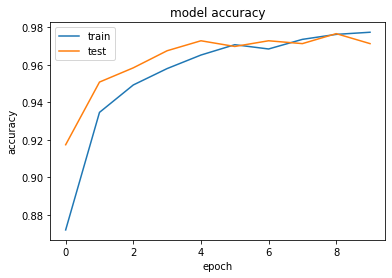

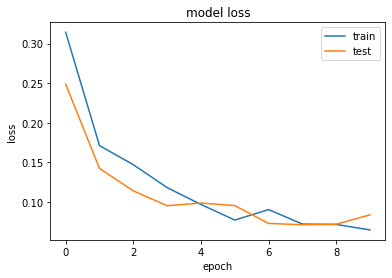

<Figure size 432x288 with 0 Axes>

In [189]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("model_accuracy.png")
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.savefig("model_Loss.png")


In [188]:
print("f1_score:",f1_score(val_lbl,model.predict_classes(val_set),))
print("recall:",recall_score(val_lbl,model.predict_classes(val_set),))
print("precision:",precision_score(val_lbl , model.predict_classes(val_set)))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])


f1_score: 0.9059405940594061
recall: 0.915
precision: 0.8970588235294118
Validation Loss: 0.08354921274338707
Validation Accuracy: 0.9712121486663818


In [186]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_319 (Dense)            (None, 16)                640       
_________________________________________________________________
leaky_re_lu_181 (LeakyReLU)  (None, 16)                0         
_________________________________________________________________
dense_320 (Dense)            (None, 128)               2176      
_________________________________________________________________
leaky_re_lu_182 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_321 (Dense)            (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_183 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
batch_normalization_95 (Batc (None, 128)             

In [187]:
model.save("musk_model.h5")